In [71]:
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
diabetes_data = load_diabetes()
df = pd.DataFrame(data=diabetes_data.data, columns=diabetes_data.feature_names)
df['target'] = diabetes_data.target

In [47]:
#1. Вивести перших 5 рядків
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [48]:
#2. Перевірити наявність пропусків. У разі виявлення замінити на середнє значення.
df.isnull().sum()

,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


In [49]:
#3. Перевірити наявність дублікатів, при виявленні – видалити.
df.duplicated().sum()

0

In [50]:
#4. Замінити бінарні ознаки. У стовпчику «стать» спочатку перевірте унікальні значення.
df['sex'].unique()
#Бінарних ознак немає

array([ 0.05068012, -0.04464164])

In [51]:
#5. Перевірити тип даних. При необхідності замінити тип даних на числовий.
df.dtypes


,0
age,float64
sex,float64
bmi,float64
bp,float64
s1,float64
s2,float64
s3,float64
s4,float64
s5,float64
s6,float64


target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64


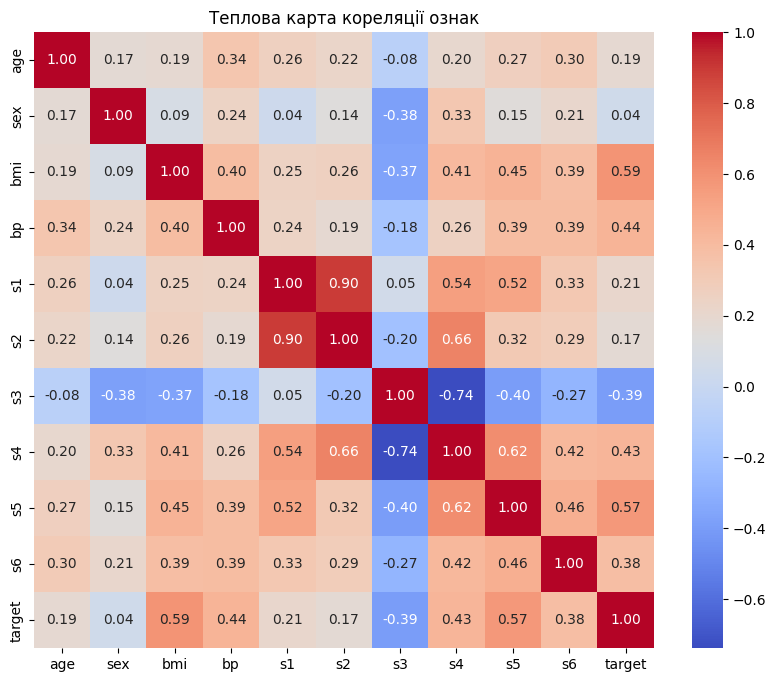

In [58]:
#6. Обчислити кореляцію між прогресом діабету і іншмим ознаками.
corr_matrix = df.corr()
#Розташувати в порядку спадання.
correlation_with_progress = corr_matrix['target'].sort_values(ascending=False)
print(correlation_with_progress)
# Побудувати теплову карту кореляції.
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Теплова карта кореляції ознак')
plt.show()

In [60]:
#7. Масштабувати ознаки.
X = df.drop(columns=['target'])
y = df['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [61]:
#8. Поділити дані на тренувальну і тестову вибірки.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [65]:
#9. Побудувати модель лінійной регресії і RandomForest регресії на основі більш корелюючих ознак (підібрати оптимальне число).
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

rf_reg = RandomForestRegressor(random_state=42, n_estimators=100)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)


In [66]:
#10. Вивести коефіцієнт детермінації і середньоквадратичну помилку.
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Лінійна регресія: MSE =", mse_lin, ", R2 =", r2_lin)
print("Random Forest регресія: MSE =", mse_rf, ", R2 =", r2_rf)

Лінійна регресія: MSE = 2900.193628493481 , R2 = 0.4526027629719196
Random Forest регресія: MSE = 2963.013847191012 , R2 = 0.44074575666493343


In [72]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Random Forest Regressor': RandomForestRegressor()
}
param_grids = {
    'Ridge Regression': {
        'alpha': [0.1, 1, 10]
    },
    'Random Forest Regressor': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20]
    }
}
best_models = {}
for name, model in models.items():
    print(f"\nНалаштування параметрів для {name}...")
    if name in param_grids:
        grid_search = GridSearchCV(model, param_grids[name], cv=5, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_models[name] = grid_search.best_estimator_
        print(f"Найкращі параметри для {name}: {grid_search.best_params_}")
    else:
        best_models[name] = model.fit(X_train, y_train)
        print(f"{name} не потребує налаштування параметрів.")
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\nОцінка {name}:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")


Налаштування параметрів для Linear Regression...
Linear Regression не потребує налаштування параметрів.

Налаштування параметрів для Ridge Regression...
Найкращі параметри для Ridge Regression: {'alpha': 10}

Налаштування параметрів для Random Forest Regressor...
Найкращі параметри для Random Forest Regressor: {'max_depth': None, 'n_estimators': 200}

Оцінка Linear Regression:
Mean Squared Error: 2900.19
R^2 Score: 0.45

Оцінка Ridge Regression:
Mean Squared Error: 2875.67
R^2 Score: 0.46

Оцінка Random Forest Regressor:
Mean Squared Error: 3053.63
R^2 Score: 0.42


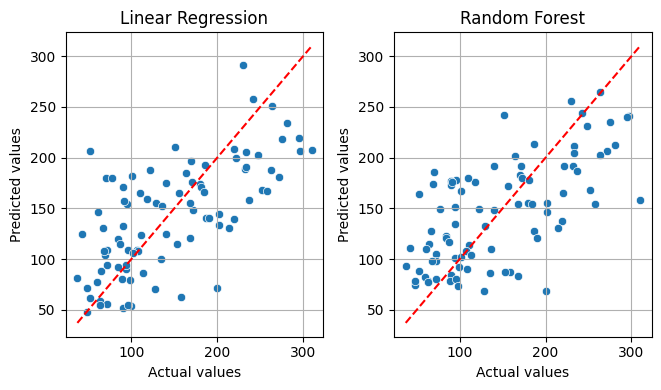

In [73]:
#11. Побудувати графіки.
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=best_models['Linear Regression'].predict(X_test))
sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Linear Regression')
plt.grid(True)
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_test, y=best_models['Random Forest Regressor'].predict(X_test))
sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Random Forest')
plt.grid(True)
plt.tight_layout()
plt.show()

In [74]:
#12. Вивести справжні і прогнозовані значення.
X = df[['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5']]
y = df['s6']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
mse1 = mean_squared_error(y_test, y_pred)
r21 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse1}")
print(f"R^2 Score: {r21}")я
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
results = results.sort_values(by='Predicted', ascending=False)

print("\nSorted Results:")
print(results)

Mean Squared Error: 0.0014599989744661695
R^2 Score: 0.23484131390545904

Sorted Results:
       Actual  Predicted
321  0.061054   0.076128
268  0.073480   0.052821
117  0.135612   0.048662
367  0.032059   0.041063
172  0.085907   0.038620
..        ...        ...
131 -0.079778  -0.048516
391 -0.050783  -0.051880
77  -0.001078  -0.052609
436 -0.046641  -0.053361
126 -0.054925  -0.059685

[89 rows x 2 columns]


Висновок: Провели попередній аналіз датасету. Обчислили кореляцію між прогресом діабету і іншмим ознаками. Розташували в порядку спадання. Побудували теплову карту кореляції. Вивели коефіцієнт детермінації і середньоквадратичну помилку для лінійної регресії(MSE = 2900.193628493481 , R2 = 0.4526027629719196) та RandomForest регресії(MSE = 2963.013847191012 , R2 = 0.44074575666493343) . Побудували графіки для регресій.